University of Stirling<br>
Computing Science and Mathematics
#### CSCU9YE - Artificial Intelligence   
## Assignment: Organising a Colour Palette 
Group : 25 Student ID : 2636161 , 2636157 , 2634926

# Algorithm Variant of our Choice (Greedy Search)

### Description of the main idea and motovation of Greedy Search

For the algorithm variant of our choice, we decided to go with the Greedy Search algorithm. It is a search method that selects the best local choice at each of the steps in the process of hopes of finding an optimal solution with not considering how optimal the current solution is. Each step in the process uses a heuristic to determine an estimate of the distance of each of the local choice from the desired goal. We chose this algorithm because it produces some of the best results over other methods all while using a minimal cost to search as no node off the solution path is expanded.

### Experiments conducted 

After testing the algorithm with both instance size we found that it improved the elucid distance and improved the colour for instance size 100 quite well over the other algorithms used but we found that it made this biggest improvement to instance size 500 as it greatly reduced the elcuid distance compared to the other algorithms and the colour pallete looked much better as well. 
We also experimented by checking how big the distance was between each of the colours in our solution to give another view of how well we implemented our solution.

## Greedy Search

### Utility functions

In [1]:
import random as rnd
# Numerical library, used keeing the list of colours and computing the Euclidean distance
import numpy as np
import matplotlib.pyplot as plt

# Read in the color data file 
# Input: string with file name
# Oputput: the number of colours (integer), and a list numpy arrays with all the colours
def read_data(fname):
    cols = np.loadtxt(fname, skiprows = 4) # The first 4 lines have text information, and are ignored     
    ncols = len(cols)     # Total number of colours and list of colours
    return ncols,cols

# Dsiplay the colors as a strip of color bars
# Input: list of colors, order of colors, and height/ratio
def plot_colors(col_list, col_order, ratio = 10): 
    assert len(col_list) == len(col_order)
    img = np.zeros((ratio, len(col_list), 3))
    for i in range(0, len(col_list)):
        img[:, i, :] = col_list[col_order[i]]
    fig, axes = plt.subplots(1, figsize=(10,6)) # figsize=(width,height) handles window dimensions
    axes.imshow(img, interpolation='nearest')
    axes.axis('off')
    plt.title("Colour Palette")
    plt.show()

# This is an auxiliary function. It calculate the Euclidean distance between two individual colours
# Input: v and u as to be numpy arrays, vectors of real numbers with the RGB coordinates.

def euclid(v, u):
    return np.linalg.norm(v - u)

# Evaluation function.  Measures the quality of a given solution (ordering of colours) 
# The function computes the sum of the distances between all consecutive colours in the ordering
# Input: cols: list of colours 
#        ordc: ordering of colours
# Output: real number with the sumf of pair-wise differences in the colour ordering

def evaluate(cols, ordc):     
    adjacentColPairs = [[cols[ordc[i]],cols[ordc[i-1]]] for i in range(1,len(ordc))]
    return sum([euclid(i[1], i[0]) for i in adjacentColPairs])

# visualise the distance between each colour in the best solution
# showcases the biggest gap's location relating to its index location
def visualise_distance(solution_index_array):
    # visualise the distance between each colour in the best solution
    # showcases the biggest gap's location relating to its index location
    distance = []
    for i in range(0, len(solution_index_array)-1):
        distance.append(euclid(colours[solution_index_array[i]], colours[solution_index_array[i+1]]))
    fig = plt.figure()
    ax = fig.add_axes([0,1,2,1])
    indices = range(0, len(solution_index_array)-1)
    ax.bar(indices, distance, width=1)
    plt.title("Gap Between Each Index")
    plt.xlabel("Index")
    plt.ylabel("Distance")
    plt.show()

### Greedy Algorithm Implementation

In [2]:
# Greedy search algoirthm that is used to sort the colours - it works by using two loops to  
# get two colours that are in the array and compare the two to get their elcuid distance
# the distance calculated is the compared to the current best one and if the new one is 
# better it is replaced and the colour is added to the solution.
def greedy_search(txtFile):
    
    ncolours, colours = read_data(txtFile)
    orderedColours = []
    # select a random point the the array of colours to start from
    startingIndex = rnd.randint(0, len(colours) - 1) #selects the position of the array that the search will start from
    orderedColours.append(startingIndex)    
    
    # Loop for the number of colours for the instance size
    for i in range(ncolours - 1): 
        # set the value of current colour being checked to the current element of the solution array
        colourIndex = orderedColours[i]
        bestDistance = ncolours 
        
        # loop that starts comparing each of the colours
        for j in range(len(colours)):
            colour1 = colours[colourIndex]  
            # only allow the value of j to be checked if the value of j currently is not in the colour 
            # index and j is not already part of the solution
            if j != colourIndex and orderedColours.__contains__(j) is False: 
                # set the value of colour two to the value of                        
                colour2 = colours[j] 
            
            # calculate the euclid distance between the two colours that are currently being checked in the loop
            newDistance = euclid(colour1, colour2)
            
            # check to see if the new calculated distance is better than the current best if the new 
            # distance is better overwrite the old best distance and best colour is added to the solution
            if newDistance < bestDistance:
                bestDistance = newDistance 
                bestColour = j      
                
        # add the best colour to the solution array         
        orderedColours.append(bestColour) 
        
    return colours,orderedColours

### Running the algorith and output for Instance size 100 and 500

Solution colour palette for instance 100


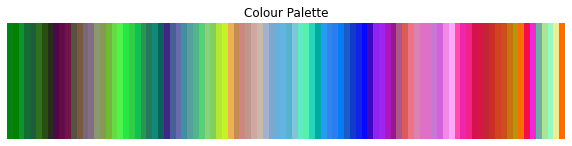

[33, 12, 14, 36, 53, 25, 56, 5, 17, 32, 92, 70, 10, 58, 75, 86, 69, 47, 52, 67, 29, 68, 76, 40, 13, 7, 20, 83, 59, 57, 9, 4, 85, 21, 26, 38, 77, 16, 34, 42, 41, 71, 27, 62, 94, 78, 50, 37, 28, 84, 87, 90, 30, 45, 43, 60, 80, 6, 63, 89, 64, 73, 3, 15, 82, 2, 8, 79, 95, 11, 39, 55, 23, 22, 48, 49, 74, 66, 93, 81, 44, 51, 46, 18, 72, 24, 31, 54, 0, 35, 19, 61, 88, 65, 1, 0]
Evaluation Result for instance 100: 17.88686659515649


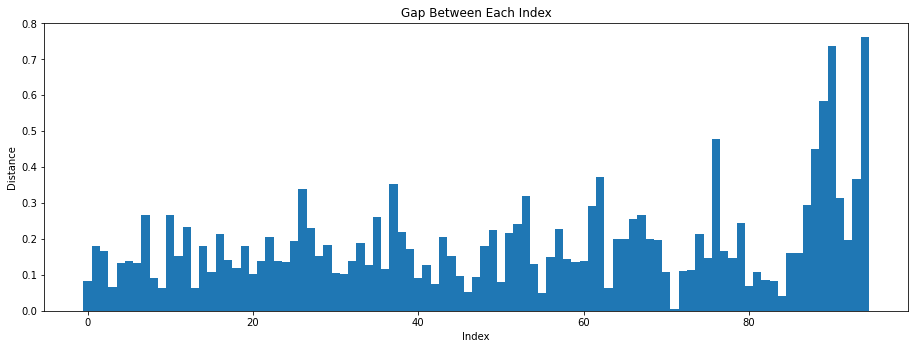


Best colour palette for instance 100


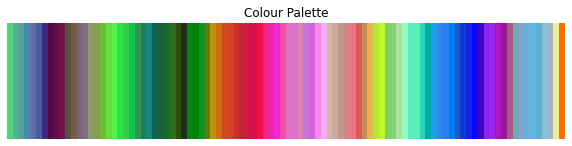

Best Evaluation Result for instance 100: 16.99679095066492



Solution colour palette for instance 500


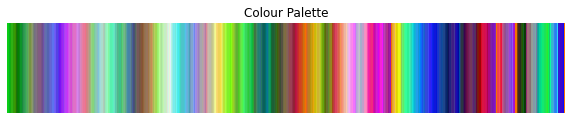

[428, 420, 165, 449, 349, 262, 484, 159, 291, 314, 12, 33, 14, 307, 40, 123, 487, 277, 361, 431, 304, 69, 86, 436, 133, 353, 75, 58, 297, 457, 306, 213, 240, 295, 57, 160, 207, 101, 292, 391, 236, 371, 232, 127, 134, 230, 327, 318, 15, 82, 247, 233, 438, 355, 199, 48, 144, 425, 402, 55, 23, 151, 472, 387, 22, 111, 39, 401, 100, 11, 446, 41, 71, 265, 142, 112, 26, 149, 145, 140, 390, 84, 367, 488, 273, 409, 241, 169, 481, 65, 229, 296, 90, 118, 87, 279, 223, 339, 85, 259, 335, 379, 21, 178, 493, 135, 4, 9, 313, 263, 121, 59, 439, 334, 231, 345, 433, 183, 10, 325, 158, 329, 368, 474, 234, 282, 395, 185, 42, 312, 289, 113, 415, 182, 221, 283, 131, 88, 405, 143, 202, 359, 303, 311, 382, 495, 398, 130, 120, 107, 448, 227, 150, 492, 198, 475, 146, 408, 451, 37, 50, 28, 369, 373, 78, 191, 326, 176, 366, 269, 381, 214, 494, 181, 157, 450, 271, 104, 27, 62, 293, 350, 445, 154, 1, 437, 344, 404, 399, 302, 138, 377, 175, 77, 219, 189, 235, 301, 421, 122, 429, 317, 424, 47, 124, 476, 432, 52, 321,

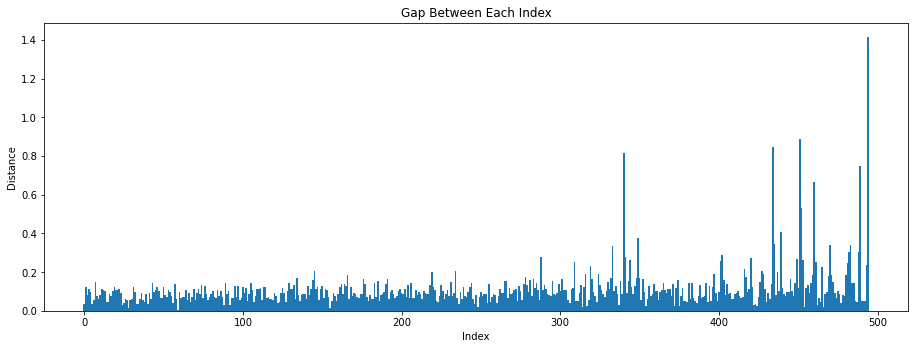

Best colour palette for instance 500


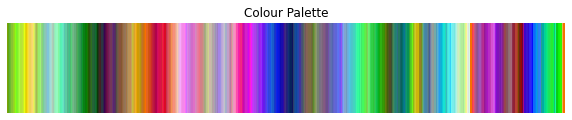

Best Evaluation Result for instance 500: 53.33824873958042


In [3]:
# Output the results from running the algorithm for instance size 100
print("Solution colour palette for instance 100")
colours, resultFor100 = greedy_search("col100.txt")
resultFor100_Eval = evaluate(colours, resultFor100)
plot_colors(colours,resultFor100,20)
print(resultFor100)
print(f'Evaluation Result for instance 100: {resultFor100_Eval}')
visualise_distance(resultFor100)

# Best results we found when carrying out the testing of our Algorithm for Instance size 100
my_best100 = [21, 85, 4, 9, 57, 59, 83, 17, 32, 92, 70, 10, 58, 75, 86, 69, 47, 52, 67, 29, 68, 76, 40, 13, 7, 20, 53, 36, 25, 56, 5, 33, 12, 14, 91, 54, 31, 24, 72, 18, 46, 51, 44, 35, 81, 93, 19, 66, 23, 55, 39, 22, 48, 49, 74, 62, 27, 71, 41, 11, 95, 42, 34, 77, 16, 38, 26, 88, 65, 87, 90, 30, 45, 43, 60, 80, 6, 63, 89, 64, 73, 3, 15, 82, 2, 8, 79, 61, 78, 50, 37, 28, 84, 94, 1, 0]
print("\nBest colour palette for instance 100")
plot_colors(colours, my_best100,20)
best100_Eval = evaluate(colours, my_best100)
print(f'Best Evaluation Result for instance 100: {best100_Eval}')




# Output the results from running the algorithm for instance size 500
print("\n\n\nSolution colour palette for instance 500")
colours, resultFor500 = greedy_search("col500.txt")
resultFor500_Eval = evaluate(colours, resultFor500)
plot_colors(colours, resultFor500,80)
print(resultFor500)
print(f'Evaluation Result for instance 500: {resultFor500_Eval}')
visualise_distance(resultFor500)


# Best results we found when carrying out the testing of our Algorithm

my_best500 = [278, 414, 124, 47, 424, 317, 429, 122, 301, 235, 189, 219, 77, 175, 16, 290, 254, 288, 252, 302, 399, 404, 344, 138, 377, 113, 289, 415, 182, 221, 112, 26, 149, 145, 140, 390, 84, 367, 488, 273, 409, 241, 169, 481, 65, 229, 296, 90, 118, 87, 279, 223, 339, 85, 259, 335, 379, 21, 178, 493, 135, 361, 277, 487, 123, 40, 307, 14, 33, 314, 12, 291, 357, 56, 462, 25, 155, 53, 36, 171, 430, 5, 453, 343, 338, 148, 102, 17, 32, 92, 336, 147, 206, 167, 351, 392, 479, 70, 183, 10, 325, 158, 329, 368, 474, 234, 282, 395, 185, 42, 312, 170, 310, 412, 397, 99, 205, 473, 54, 98, 243, 31, 423, 0, 363, 294, 24, 72, 18, 46, 209, 141, 332, 442, 44, 245, 410, 51, 137, 35, 358, 255, 300, 95, 248, 482, 298, 108, 299, 162, 106, 461, 330, 128, 74, 180, 49, 372, 285, 463, 472, 151, 387, 22, 402, 55, 23, 111, 39, 401, 100, 11, 446, 41, 71, 265, 142, 350, 445, 154, 62, 293, 181, 157, 494, 214, 269, 381, 366, 176, 385, 212, 309, 163, 94, 226, 465, 450, 271, 104, 27, 250, 166, 260, 66, 93, 103, 81, 411, 286, 490, 276, 115, 480, 478, 384, 19, 251, 355, 438, 233, 193, 323, 356, 15, 82, 247, 318, 327, 230, 134, 136, 109, 452, 266, 168, 63, 89, 407, 64, 315, 441, 203, 347, 126, 477, 374, 83, 253, 466, 319, 365, 208, 270, 456, 274, 346, 362, 380, 324, 287, 439, 334, 231, 345, 433, 467, 190, 464, 455, 470, 187, 119, 304, 69, 86, 436, 133, 353, 75, 58, 297, 457, 306, 213, 240, 295, 57, 160, 207, 101, 292, 391, 236, 371, 232, 127, 394, 326, 191, 78, 373, 50, 37, 451, 408, 146, 475, 198, 386, 261, 97, 375, 110, 340, 256, 267, 67, 321, 52, 38, 228, 238, 342, 68, 152, 360, 337, 76, 348, 165, 449, 349, 262, 484, 159, 91, 389, 222, 416, 220, 258, 177, 458, 316, 485, 216, 215, 13, 341, 20, 161, 393, 419, 7, 284, 200, 96, 476, 432, 421, 201, 434, 237, 328, 173, 400, 440, 116, 431, 4, 9, 313, 263, 121, 59, 244, 186, 417, 483, 61, 369, 28, 422, 43, 114, 383, 459, 184, 30, 280, 492, 227, 150, 225, 448, 120, 107, 130, 398, 202, 359, 143, 405, 131, 88, 283, 1, 437, 382, 303, 311, 0, 275, 257, 443, 79, 406, 164, 204, 192, 426, 197, 370, 8, 196, 491, 2, 396, 117, 144, 425, 48, 199, 469, 211, 454, 447, 320, 427, 333, 242, 239, 217, 105, 139, 249, 489, 418, 471, 156, 388, 444, 376, 435, 264, 460, 195, 268, 172, 3, 153, 308, 468, 331, 246, 218, 73, 403, 6, 486, 305, 80, 354, 60, 210, 45, 272, 364, 281, 194, 378, 188, 29, 132, 125, 352, 413, 428, 420, 174, 322, 129, 34, 0, 0]
print("Best colour palette for instance 500")
plot_colors(colours, my_best500,80)
best500_Eval = evaluate(colours, my_best500)
print(f'Best Evaluation Result for instance 500: {best500_Eval}')






## Furthering the algorithm

The function for finding largest gaps between indeces could be used to target outliers and randomly move them to different positions in the solution array with the aim of reducing the overall gap.